<a href="https://colab.research.google.com/github/alpARYA/PRODIGY_ML_03/blob/main/Classification_of_Dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/cats-and-dogs-40.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

In [7]:
tf.__version__

'2.17.0'

In [8]:
Categories = ['cat', 'dog']
 # input arr
flat_data_arr = []
 # output arr
target_arr = []

# Specify the main directory containing both training and testing subdirectories
main_datadir = 'catsAndDogs40/'

# Iterate through both training and testing categories
for category in Categories:
    print(f'loading... category: {category}')

    # Specify the subdirectories for training and testing
    train_or_test_dirs = ['train', 'test']

    for train_or_test in train_or_test_dirs:
        # Form the complete path
        path = os.path.join(main_datadir, train_or_test, category)

        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (40, 40, 3))  # Adjust the size as needed
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))

        print(f'loaded {train_or_test} category: {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading... category: cat
loaded train category: cat successfully
loaded test category: cat successfully
loading... category: dog
loaded train category: dog successfully
loaded test category: dog successfully


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(80, 4801)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,Target
0,0.678514,0.501916,0.482027,0.715377,0.523339,0.505292,0.731195,0.540612,0.511806,0.703798,...,0.169081,0.220060,0.290427,0.197954,0.248934,0.319293,0.172284,0.223264,0.293624,0
1,0.918375,0.934061,0.945826,0.872439,0.888125,0.899890,0.820740,0.836425,0.848190,0.822877,...,0.380788,0.348506,0.323377,0.650791,0.643377,0.634157,0.688930,0.674592,0.662709,0
2,0.757480,0.710687,0.726965,0.784735,0.721737,0.735972,0.848773,0.765288,0.776371,0.852494,...,0.877800,0.807708,0.750978,0.925796,0.867060,0.830408,0.995605,0.948267,0.942523,0
3,0.877981,0.858240,0.739608,0.957308,0.931234,0.854248,0.971673,0.938945,0.897099,0.961905,...,0.884318,0.833338,0.770593,0.854292,0.803312,0.740567,0.844212,0.793232,0.730487,0
4,0.118639,0.132126,0.085319,0.470288,0.512583,0.470558,0.286970,0.334851,0.309086,0.262859,...,0.613957,0.634996,0.683518,0.586822,0.610671,0.662661,0.598905,0.627302,0.680549,0


In [11]:
x=df.iloc[:,:-1]

y=df.iloc[:,-1]

# **Splitting the dataset in training and test**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77)

In [13]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

# **Fitting the model on training set**

In [14]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [15]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 56.25% accurate


In [16]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       1.00      0.22      0.36         9
         dog       0.50      1.00      0.67         7

    accuracy                           0.56        16
   macro avg       0.75      0.61      0.52        16
weighted avg       0.78      0.56      0.50        16



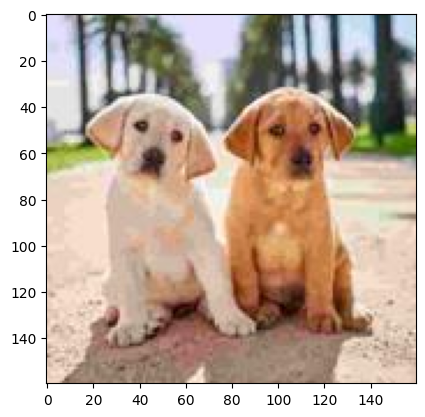

The predicted image is : dog


In [17]:
path='catsAndDogs40/test/dog/6.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])

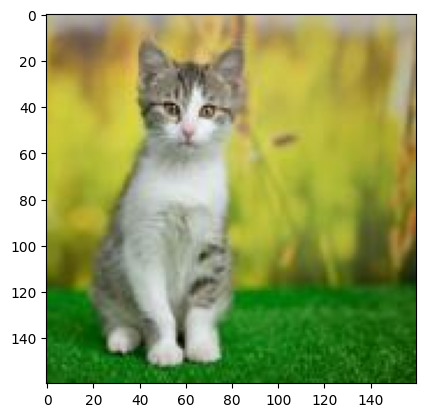

The predicted image is : cat


In [18]:
path='catsAndDogs40/test/cat/5.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])